## 3.1. Definición del Problema y Recopilación de Datos

**Tema:** Análisis de resultados y estilos de juego en la Premier League.

**Relevancia:** El fútbol es el deporte más popular del mundo, y la Premier League es una de las ligas más competitivas y seguidas. Analizar sus datos nos permite descubrir patrones de juego, evaluar el rendimiento de los equipos y entender factores clave como la ventaja de jugar en casa. Este análisis puede ser de interés tanto para aficionados como para analistas deportivos.

**Preguntas de Investigación:**
1.  **¿El equipo local gana con más frecuencia de lo que lo hace el visitante?**
2.  **¿El resultado al descanso determina el resultado final?.**
3.  **¿Podemos identificar estilos de partidos basándonos en cantidad total de goles y cantidad total de tiros?**

**Fuente de Datos:**
El conjunto de datos utilizado es `final_dataset.csv`, que contiene estadísticas detalladas de los partidos de la Premier League desde la temporada 2000-01 hasta la 2021-22. Fue obtenido de Kaggle y consolidado a partir de múltiples fuentes.

**Variables Principales a Utilizar:**
- `FTR`: Resultado del partido al final (H=Victoria Local, A=Victoria Visitante, D=Empate).
- `HTR`: Resultado al descanso (H=Local, A=Visitante, D=Empate).
- `FTHG`, `FTAG`: Goles del local y del visitante al final.
- `HS`, `AS`: Tiros del local y del visitante.

### Carga de Librerías y Datos

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Establecer un estilo para los gráficos
sns.set_style("whitegrid")

In [45]:
# Cargar y combinar los conjuntos de datos de cada temporada
# La ruta es relativa a la raíz del proyecto, por lo que accedemos a la carpeta 'data/Datasets'
path = '../data/Datasets/'
# Usamos glob para encontrar todos los archivos que coinciden con el patrón de temporada (ej. '2000-01.csv')
files = glob.glob(os.path.join(path, '20??-??.csv'))

# Leemos y concatenamos todos los archivos en un solo DataFrame
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)

# Mostrar las primeras 5 filas del dataframe combinado
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Obtener información general del dataset, incluyendo tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         6840 non-null   object 
 1   Date        6840 non-null   object 
 2   HomeTeam    6840 non-null   object 
 3   AwayTeam    6840 non-null   object 
 4   FTHG        6840 non-null   int64  
 5   FTAG        6840 non-null   int64  
 6   FTR         6840 non-null   object 
 7   HTHG        6840 non-null   int64  
 8   HTAG        6840 non-null   int64  
 9   HTR         6840 non-null   object 
 10  Attendance  759 non-null    float64
 11  Referee     6840 non-null   object 
 12  HS          6840 non-null   int64  
 13  AS          6840 non-null   int64  
 14  HST         6840 non-null   int64  
 15  AST         6840 non-null   int64  
 16  HHW         760 non-null    float64
 17  AHW         760 non-null    float64
 18  HC          6840 non-null   int64  
 19  AC          6840 non-null  

## 3.2. Análisis Exploratorio de Datos (EDA)

### Estadísticos Descriptivos

In [38]:
# Calcular estadísticos descriptivos para las columnas numéricas
df.describe()

,FTHG,FTAG,HTHG,HTAG,Attendance,HS,AS,HST,AST,HHW,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
count,6840.000000,6840.000000,6840.000000,6840.000000,759.000000,6840.000000,6840.000000,6840.000000,6840.000000,760.000000,...,3410.000000,3410.000000,3410.000000,3410.000000,2279.000000,2279.000000,2279.000000,760.000000,760.000000,760.000000
mean,1.527485,1.130263,0.681725,0.491959,33718.504611,13.502047,10.488304,6.431725,4.924269,0.342105,...,2.016774,1.943721,2.195827,2.091437,2.840039,4.178513,5.071057,3.112171,4.408987,5.364184
std,1.297913,1.124566,0.827241,0.708971,12108.931821,5.182698,4.472513,3.378802,2.843091,0.608517,...,0.594828,0.488168,1.228692,0.958042,1.874267,1.243945,4.190385,2.397046,1.651855,4.817252
min,0.000000,0.000000,0.000000,0.000000,14651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.010000,1.070000,1.050000,1.090000,2.950000,1.200000,1.080000,2.890000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,24707.000000,10.000000,7.000000,4.000000,3.000000,0.000000,...,1.860000,1.810000,1.890000,1.840000,1.685000,3.430000,2.445000,1.670000,3.370000,2.350000
50%,1.000000,1.000000,0.000000,0.000000,32910.000000,13.000000,10.000000,6.000000,4.000000,0.000000,...,1.970000,1.910000,2.010000,1.950000,2.220000,3.700000,3.630000,2.260000,3.730000,3.555000
75%,2.000000,2.000000,1.000000,1.000000,39834.000000,17.000000,13.000000,8.000000,7.000000,1.000000,...,2.090000,2.030000,2.130000,2.060000,3.160000,4.390000,5.620000,3.332500,4.792500,5.742500
max,9.000000,7.000000,5.000000,5.000000,67683.000000,43.000000,30.000000,24.000000,20.000000,4.000000,...,13.000000,9.300000,21.580000,15.140000,15.500000,13.620000,28.500000,18.000000,15.000000,28.500000


### Visualizaciones Clave

## 3.3. Preparación de Datos

C:\Users\ronal\AppData\Local\Temp\ipykernel_27596\3272625736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FTR', data=df, palette=['green','gray','red'], order=order)


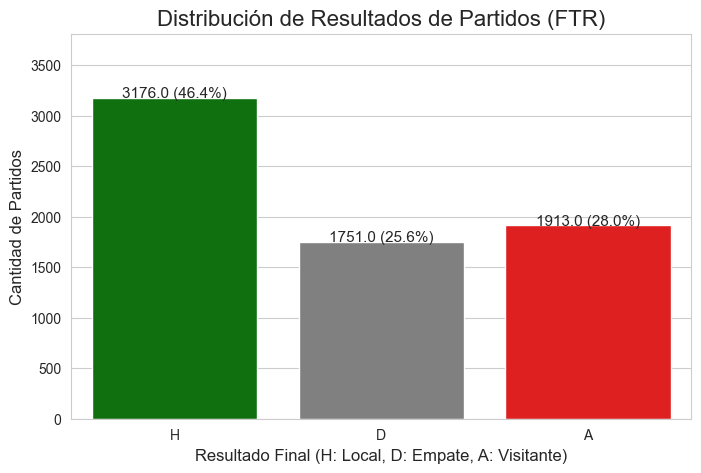

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteos
counts = df['FTR'].value_counts()
total = counts.sum()

# Orden fijo
order = ['H', 'D', 'A']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='FTR', data=df, palette=['green','gray','red'], order=order)

plt.title('Distribución de Resultados de Partidos (FTR)', fontsize=16)
plt.xlabel('Resultado Final (H: Local, D: Empate, A: Visitante)', fontsize=12)
plt.ylabel('Cantidad de Partidos', fontsize=12)

# Agregar etiquetas con cantidad y porcentaje
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width()/2, height + 5,
            f'{height} ({percentage:.1f}%)',
            ha='center', fontsize=11)

plt.ylim(0, max(counts)*1.2)
plt.show()

**Observación:** Como se puede ver claramente, los equipos locales (H) ganan con más frecuencia que los equipos visitantes (A), y los empates (D) son el resultado menos común, aunque siguen siendo una parte significativa de los partidos. Esto apoya visualmente la idea de que podría existir una "ventaja de jugar en casa".

FTR,H,D,A
HTR,,,
H,1961,330,124
D,1061,1085,707
A,154,336,1082


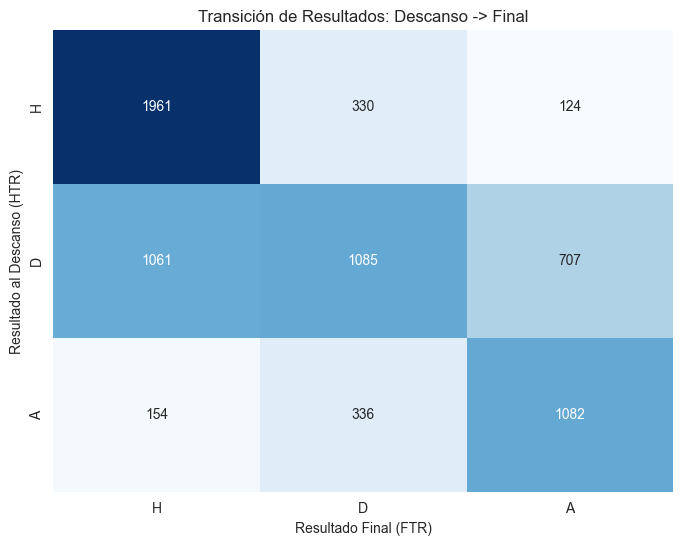

In [40]:
# Definir el orden para que sea intuitivo: Local -> Empate -> Visitante
df_resultados = df[['HTR', 'FTR']].dropna()
orden = ['H', 'D', 'A']

# Crear la tabla cruzada (Crosstab)
tabla_contingencia = pd.crosstab(
    df_resultados['HTR'], # Filas: Medio Tiempo
    df_resultados['FTR']  # Columnas: Final
).reindex(index=orden, columns=orden)

display(tabla_contingencia)

# Visualizar con un Mapa de Calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Transición de Resultados: Descanso -> Final')
plt.xlabel('Resultado Final (FTR)')
plt.ylabel('Resultado al Descanso (HTR)')
plt.show()

**Observación:** A diferencia del resultado final donde la victoria local era dominante, **al descanso el Empate (D) es un resultado muy frecuente** (casi tan frecuente como la victoria local en algunas temporadas). Esto sugiere que muchos partidos se rompen o deciden en la segunda mitad. Será interesante analizar en la Pregunta 2 cómo transicionan estos estados.

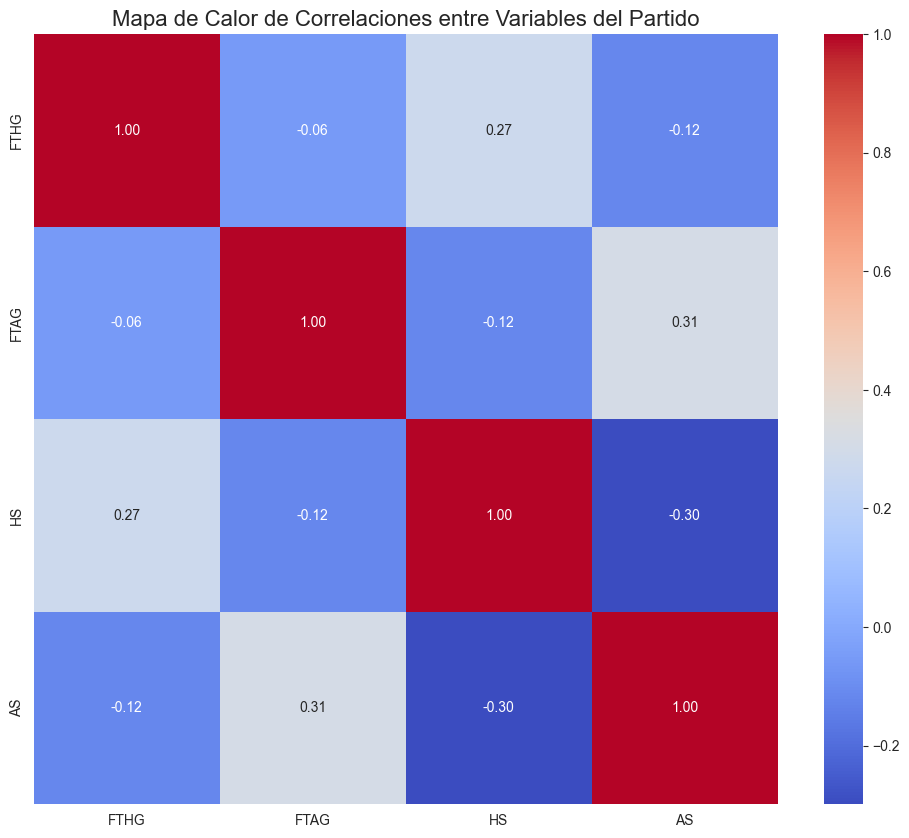

In [41]:
# 3. Mapa de Calor de Correlaciones
# Seleccionamos solo las columnas numéricas relevantes para el análisis
numeric_cols = ['FTHG', 'FTAG', 'HS', 'AS']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones entre Variables del Partido', fontsize=16)
plt.show()

**Observación:** El mapa de calor confirma que no existen correlaciones críticas a tener en cuenta.

### Limpieza de Valores Nulos y Guardado

In [42]:
# Eliminar filas con valores nulos SOLO en las columnas críticas para nuestro análisis
# Definimos las columnas que son esenciales (Agregamos HTR)
critical_columns = ['FTHG', 'FTAG', 'FTR', 'HTR', 'HS', 'AS']

# Eliminamos filas solo si falta información en alguna de estas columnas
df_clean = df.dropna(subset=critical_columns)

# Verificar que ya no hay nulos y ver el tamaño del dataset limpio
print(f"Tamaño original: {df.shape}")
print(f"Tamaño después de limpiar: {df_clean.shape}")
print("\nInformación del dataset limpio:")
df_clean.info()

Tamaño original: (6840, 82)
Tamaño después de limpiar: (6840, 82)

Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         6840 non-null   object 
 1   Date        6840 non-null   object 
 2   HomeTeam    6840 non-null   object 
 3   AwayTeam    6840 non-null   object 
 4   FTHG        6840 non-null   int64  
 5   FTAG        6840 non-null   int64  
 6   FTR         6840 non-null   object 
 7   HTHG        6840 non-null   int64  
 8   HTAG        6840 non-null   int64  
 9   HTR         6840 non-null   object 
 10  Attendance  759 non-null    float64
 11  Referee     6840 non-null   object 
 12  HS          6840 non-null   int64  
 13  AS          6840 non-null   int64  
 14  HST         6840 non-null   int64  
 15  AST         6840 non-null   int64  
 16  HHW         760 non-null    float64
 17  AHW       

In [43]:
# Guardar el dataset limpio en un nuevo archivo CSV
clean_file_path = '../data/cleaned_dataset.csv'
df_clean.to_csv(clean_file_path, index=False)
print(f"Dataset limpio guardado exitosamente en: {clean_file_path}")

Dataset limpio guardado exitosamente en: ../data/cleaned_dataset.csv
